In [4]:
import keras
import pandas as pd
from keras import layers, Sequential
import argparse
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import os

In [2]:
csv_path='yoga-pose-image-classification-dataset/dataset/Beginners/yoga_pose.csv'

In [5]:
# Load .csv Data
df = pd.read_csv(csv_path)
class_list = df['Yoga_Pose'].unique()
class_list = sorted(class_list)
class_number = len(class_list)

# Create training and validation splits
x = df.copy()
y = x.pop('Yoga_Pose')
y, _ = y.factorize()
x = x.astype('float64')
y = keras.utils.to_categorical(y)

In [7]:
df.shape

(635, 133)

In [8]:
# Split training data (X, y) into (X_train, y_train) and (X_val, y_val)
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                  test_size=0.15)

In [9]:
print('[INFO] Loaded csv Dataset')

model = Sequential([
    layers.Dense(512, activation='relu', input_shape=[x_train.shape[1]]),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_number, activation="softmax")
])

# Model Summary
print('Model Summary: ', model.summary())


[INFO] Loaded csv Dataset
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               68096     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 29)                7453      
                                                                 
Total params: 206877 (808.11 KB)
Trainable params: 206877 (808.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model Summary:  None


In [10]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
checkpoint_path = "yoga-pose-image-classification-dataset/dataset/Beginners"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                             monitor='val_accuracy',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=20)

print('[INFO] Model Training Started ...')


[INFO] Model Training Started ...


In [20]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=33,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint,earlystopping])

print('[INFO] Model Training Completed')




Epoch 1/200
 1/17 [>.............................] - ETA: 0s - loss: 0.0371 - accuracy: 1.0000
Epoch 1: val_accuracy did not improve from 0.37500
17/17 [==============================] - 0s 12ms/step - loss: 0.0963 - accuracy: 0.9666 - val_loss: 4.7546 - val_accuracy: 0.3333
Epoch 2/200
 1/17 [>.............................] - ETA: 0s - loss: 0.0266 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.37500
17/17 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.9833 - val_loss: 4.7177 - val_accuracy: 0.3438
Epoch 3/200
 1/17 [>.............................] - ETA: 0s - loss: 0.0337 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.37500
17/17 [==============================] - 0s 3ms/step - loss: 0.0546 - accuracy: 0.9833 - val_loss: 4.7005 - val_accuracy: 0.3333
Epoch 4/200
 1/17 [>.............................] - ETA: 0s - loss: 0.0351 - accuracy: 1.0000
Epoch 4: val_accuracy did not improve from 0.37500
17/17 [=====================

33

In [21]:
# Plot History
metric_loss = history.history['loss']
metric_val_loss = history.history['val_loss']
metric_accuracy = history.history['accuracy']
metric_val_accuracy = history.history['val_accuracy']



In [22]:
# Construct a range object which will be used as x-axis (horizontal plane) of the graph.
epochs = range(len(metric_loss))

[INFO] Successfully Saved metrics.png


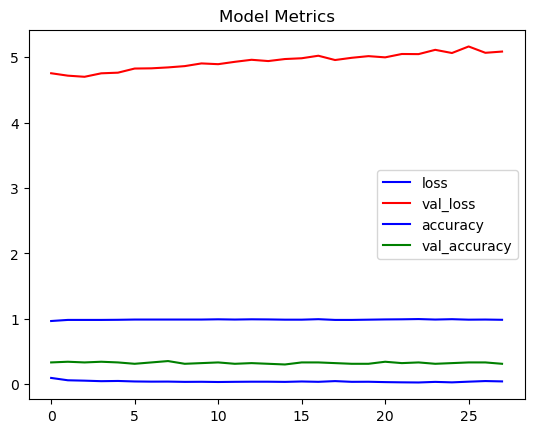

In [23]:


# Plot the Graph.
plt.plot(epochs, metric_loss, 'blue', label=metric_loss)
plt.plot(epochs, metric_val_loss, 'red', label=metric_val_loss)
plt.plot(epochs, metric_accuracy, 'blue', label=metric_accuracy)
plt.plot(epochs, metric_val_accuracy, 'green', label=metric_val_accuracy)

# Add title to the plot.
plt.title(str('Model Metrics'))

# Add legend to the plot.
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])

# If the plot already exist, remove
plot_png = os.path.exists('metrics.png')
if plot_png:
    os.remove('metrics.png')
    plt.savefig('metrics.png', bbox_inches='tight')
else:
    plt.savefig('metrics.png', bbox_inches='tight')
print('[INFO] Successfully Saved metrics.png')